EL siguiente cuaderno corresponde a un predictor de jubilaciones antisipadas, el mismo sera utilizando random forest.

In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
InSSSeP=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prevision2019.csv")
InSSSeP.head()


,Edad,Aporte,Sexo,enf,niveled,Est_civ,hab en sal min,Dependientes,jubilado
0,61,37,M,0,S,2,5,1,0
1,65,27,F,0,S,2,4,0,0
2,60,34,F,0,U,2,12,0,0
3,61,36,F,0,U,2,9,0,0
4,60,31,F,1,U,2,7,0,1


In [25]:
InSSSeP2=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/jom 2019.xlsx")
InSSSeP2.head()

,Edad,Aporte,Sexo,enf,niveled,Est_civ,hab en sal min,Dependientes,jubilado
0,61,37,M,0,S,2,5.421133,1,0
1,65,27,F,0,S,2,4.406938,0,0
2,60,34,F,0,U,2,12.004335,0,0
3,61,36,F,0,U,2,8.954465,0,0
4,60,31,F,1,U,2,6.742497,0,1


In [26]:
InSSSeP2.insert(3, "SexoNum", 1, allow_duplicates=True)
InSSSeP2.insert(5, "NivelEstudioNum", 1, allow_duplicates=True)
InSSSeP2.head()



,Edad,Aporte,Sexo,SexoNum,enf,NivelEstudioNum,niveled,Est_civ,hab en sal min,Dependientes,jubilado
0,61,37,M,1,0,1,S,2,5.421133,1,0
1,65,27,F,1,0,1,S,2,4.406938,0,0
2,60,34,F,1,0,1,U,2,12.004335,0,0
3,61,36,F,1,0,1,U,2,8.954465,0,0
4,60,31,F,1,1,1,U,2,6.742497,0,1


In [27]:
# Cambio los valores 0 si es varon o 1 si es mujer
InSSSeP2.loc[:, "SexoNum"] = InSSSeP2["Sexo"].apply(
    lambda x: 0 if x == 'M' else 1
)


InSSSeP2.head()

,Edad,Aporte,Sexo,SexoNum,enf,NivelEstudioNum,niveled,Est_civ,hab en sal min,Dependientes,jubilado
0,61,37,M,0,0,1,S,2,5.421133,1,0
1,65,27,F,1,0,1,S,2,4.406938,0,0
2,60,34,F,1,0,1,U,2,12.004335,0,0
3,61,36,F,1,0,1,U,2,8.954465,0,0
4,60,31,F,1,1,1,U,2,6.742497,0,1


In [29]:
#Cambio a númerico los valores de nivel de estudio y los dejo en la columna "NivelEstudioNum"
def estudio(x):
    if x == "P":
        return 1
    else:
          if x == "S":
           return 2
          else:
           return 3


InSSSeP2.loc[:, "NivelEstudioNum"] = InSSSeP2["niveled"].apply(
    lambda x: estudio(x)
    )

InSSSeP2.head()

,Edad,Aporte,Sexo,SexoNum,enf,NivelEstudioNum,niveled,Est_civ,hab en sal min,Dependientes,jubilado
0,61,37,M,0,0,2,S,2,5.421133,1,0
1,65,27,F,1,0,2,S,2,4.406938,0,0
2,60,34,F,1,0,3,U,2,12.004335,0,0
3,61,36,F,1,0,3,U,2,8.954465,0,0
4,60,31,F,1,1,3,U,2,6.742497,0,1


In [30]:
InSSSeP2.describe()


,Edad,Aporte,SexoNum,enf,NivelEstudioNum,Est_civ,hab en sal min,Dependientes,jubilado
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,62.866267,33.934132,0.560878,0.095808,1.940120,2.303393,6.120792,0.239521,0.145709
std,3.320253,4.283649,0.496776,0.294622,0.787659,1.421186,2.648947,0.512362,0.353166
min,52.000000,23.000000,0.000000,0.000000,1.000000,0.000000,0.650417,0.000000,0.000000
25%,60.000000,31.000000,0.000000,0.000000,1.000000,2.000000,4.302998,0.000000,0.000000
50%,62.000000,33.000000,1.000000,0.000000,2.000000,2.000000,5.421133,0.000000,0.000000
75%,64.000000,37.000000,1.000000,0.000000,3.000000,2.000000,7.622774,0.000000,0.000000
max,78.000000,46.000000,1.000000,1.000000,3.000000,7.000000,19.592086,3.000000,1.000000


In [39]:
#importo las librerias de sekitlarn para dividir el datasource en entrenamiento y pruebas
#Utilizo 70% de los datos para entrenar y 30% de ellos para probar el modelo
from sklearn.model_selection import train_test_split
x=InSSSeP2[['Edad','Aporte','SexoNum','enf','NivelEstudioNum','Est_civ','hab en sal min','Dependientes']]
y=InSSSeP2['jubilado']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [42]:
from sklearn.ensemble import RandomForestClassifier
#Utilizo un clasificador Gausiano
clf=RandomForestClassifier(n_estimators=100)
#Entreno el modelo con las caracteristicas de entrenamiento y las etiquetas de entrenamiento
#Realizo las pruebas con las caracteristicas de prueba
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [43]:
#Luego de realizar el entrenamiento se realizan las predicciones
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9668874172185431


In [44]:
#Ahora podemos refinar el modelo usando la variabla de importancia de las caracteristicas
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
InSSSeP2.columns


Index(['Edad', 'Aporte', 'Sexo', 'SexoNum', 'enf', 'NivelEstudioNum',
       'niveled', 'Est_civ', 'hab en sal min', 'Dependientes', 'jubilado'],
      dtype='object')

In [57]:
#Observo que caracteristicas tubienron menos importancia en la clasificación
import pandas as pd
Importancia_de_caracteristica =pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
Importancia_de_caracteristica

Aporte             0.432639
Edad               0.319061
hab en sal min     0.119208
Est_civ            0.047860
NivelEstudioNum    0.031492
Dependientes       0.021709
SexoNum            0.018392
enf                0.009638
dtype: float64

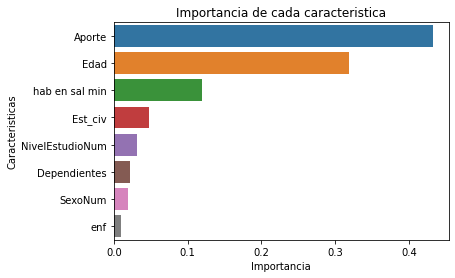

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=Importancia_de_caracteristica,y=Importancia_de_caracteristica.index)
plt.xlabel("Importancia")
plt.ylabel("Caracteristicas")
plt.title("Importancia de cada caracteristica")
plt.show()

Observando que existen caracteristicas que aportan muy poco en el modelo las quitaremos y volveremos a correrlo

In [61]:
from sklearn.model_selection import train_test_split
x=InSSSeP2[['Edad','Aporte','NivelEstudioNum','Est_civ','hab en sal min','Dependientes']]
y=InSSSeP2['jubilado']
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.7,random_state=5)

In [64]:
from sklearn.ensemble import  RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
nueva_prediccion=clf.predict(x_test)
from sklearn import metrics

print("Precisión:",metrics.accuracy_score(y_test,nueva_prediccion))

Precisión: 0.9743589743589743
